In [1]:
from ml.mixture import GaussianMixture

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
mean1 = [0, 0]
cov1 = [[3, 5], [5, 10]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T

mean2 = [5, 5]
cov2 = [[6, 3], [3, 2]]  # diagonal covariance
x2, y2 = np.random.multivariate_normal(mean2, cov2, 80).T

mean3 = [10, 10]
cov3 = [[2, 0], [0, 4]]  # diagonal covariance
x3, y3 = np.random.multivariate_normal(mean3, cov3, 70).T

x = np.hstack((x1,x2,x3))
y = np.hstack((y1,y2,y3))

In [4]:
X = np.vstack((x,y)).T

In [5]:
print(X.shape)

(250, 2)


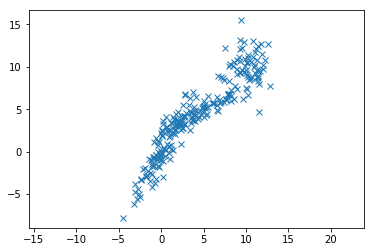

In [6]:
plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

In [7]:
model = GaussianMixture(n_components=3, n_init=3)

In [8]:
model = model.fit(X)

In [9]:
print(model.weights_)

[0.40890875 0.2775966  0.31349465]


In [10]:
print(model.means_)

[[ 0.16547421  0.31804115]
 [10.05554225  9.89395611]
 [ 4.59467639  4.69409926]]


In [11]:
print(model.covariances_)

[[[2.98407476 4.88786787]
  [4.88786787 9.67678574]]

 [[1.97079557 0.24765445]
  [0.24765445 3.40428885]]

 [[5.91620522 3.13751729]
  [3.13751729 1.95662031]]]


In [12]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


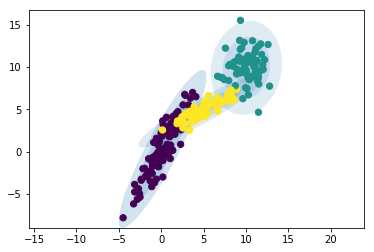

In [13]:
plot_gmm(model, X)